# Laboratorio 2. Práctica 1 - Fundamentos de redes neuronales
## Preparación de entorno
### Gonzalo de las Heras
### Jorge de la Fuente
#### Importar librerías de código

In [3]:
# Aquí se importan las librerias que se van a utiliar

%reset

import imageio
import os
import imageio
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D  
from IPython.display import HTML

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Diseño de la red neuronal a implementar
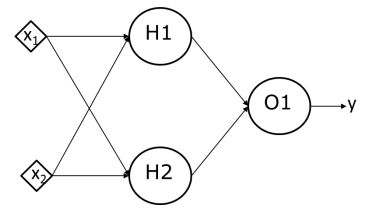

In [5]:
# Función para calcular la salida de la red neuronal anterior.
"""
   Entradas: 
       Valores:
       FuncionActivacion:
   Salidas:  
       Valores de salida de la red.
"""
def Calcular(Valores, FuncionActivacion):
    
    # Valores de la entrada
    Entradas = np.array(Valores.loc[:, 'entrada'])
    
    # Pesos
    Pesos_n1 = np.array(Valores.loc[:, 'pesos_n1'])
    Pesos_n2 = np.array(Valores.loc[:, 'pesos_n2'])
    Pesos_salida = np.array(Valores.loc[:, 'pesos_salida'])
    
    # Cálculo de valores
    H1 = Get_Salida_Funcion(np.sum([Entradas[0] * Pesos_n1[0], Entradas[1] * Pesos_n1[1]]), FuncionActivacion)
    H2 = Get_Salida_Funcion(np.sum([Entradas[0] * Pesos_n2[0], Entradas[1] * Pesos_n2[1]]), FuncionActivacion)
    O1 = Get_Salida_Funcion(np.sum([H1 * Pesos_salida[0], H2 * Pesos_salida[1]]), FuncionActivacion)
    
    # Salida
    print("Entradas: " + str(Entradas) + " , " + str(FuncionActivacion) + ": \n")
    print("H1: > " + str(H1) + "\n")
    print("H2: > " + str(H2) + "\n")
    print("O1: > " + str(O1) + "\n")
    
    return O1

In [6]:
# Función ReLu.
def Funcion_ReLU (Entrada_x):
    return np.maximum(0, Entrada_x)

In [7]:
# Función sigmoide.
def Funcion_Sigmoide (Entrada_x):
    return 1 / (1 + np.exp(-Entrada_x))

In [8]:
# Función signo.
def Funcion_Signo (Entrada_x, Umbral):
    if (Entrada_x > Umbral):
        return 1
    elif (round(Entrada_x, 1) == round(Umbral, 1)):
        return 1
    else:
        return 0

In [9]:
# Función para elegir que función de activación emplear.
def Get_Salida_Funcion (Entrada_x, Funcion):
    if (Funcion == "ReLU"):
        return Funcion_ReLU(Entrada_x)
    elif (Funcion == "Sigmoide"): 
        return Funcion_Sigmoide(Entrada_x)

In [10]:
# Cálculo de error.
def Calculo_Error(Salida_Esperada, Salida_Obtenida):
    return Salida_Esperada - Salida_Obtenida

In [11]:
# Cálculo salida perceptrón de 2 entradas.
def Calcular_Perceptron_2_Entradas(Entradas, Pesos, Umbral):
    return Funcion_Signo(np.sum([Entradas[0] * Pesos[0], Entradas[1] * Pesos[1]]), Umbral)

### Utilidades

In [12]:
# Función para pintar la distribución y la recta separatoria
def pintar_OR(punto_A_x, punto_B_x, punto_A_y, punto_B_y, titulo, itr, mostrar = False):
    
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    
    # Límites
    ax.set_xlim((-0.5, 1.5))
    ax.set_ylim((-0.5, 1.5))
    
    # Título
    ax.set_title(titulo)

    # Circulos
    circle1 = plt.Circle((0, 0), 0.03, color='blue')
    circle2 = plt.Circle((0, 1), 0.03, color='r')
    circle3 = plt.Circle((1, 0), 0.03, color='r')
    circle4 = plt.Circle((1, 1), 0.03, color='r')

    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
    ax.add_artist(circle4)

    # Recta
    l = Line2D([punto_A_x,punto_B_x],[punto_A_y,punto_B_y])                                    
    ax.add_line(l) 
    
    # Mostrar la gráfica
    if mostrar is True:
        plt.show()
    
    fig.savefig('img/' + str(itr) + '.png', dpi=fig.dpi)
    plt.close()

In [13]:
# Función crear un vídeo con la transformación de la matriz de pesos.
def crear_video(numImagenes):
    
    imageio.plugins.ffmpeg.download()

    images = []
    
    if os.path.exists('img/') :  
        
        # Recolección de las imágenes que componen el vídeo
        for i in range(1, numImagenes):  
            images.append(imageio.imread('img/' + str(i) + '.png'))
        
        writer = imageio.get_writer('Evolucion.mp4', fps=6)
        
        for im in images:
            writer.append_data(im)
        writer.close()
                
    else :
        print("No existe el directorio /img/")

## Implementación 1. Función de activación f(S).

In [14]:
# Valores de prueba
valores = pd.read_csv('../Datos/red_neuronal1.csv', header=0)
#valores = pd.read_csv('../Datos/red_neuronal2.csv', header=0)

# Funciones de activación posibles (ReLU, Sigmoide)
Calcular(valores, 'Sigmoide')

Entradas: [ 2 -1] , Sigmoide: 

H1: > 0.5

H2: > 0.999088948806

O1: > 0.119490184414



0.11949018441351315

## Implementación 2. Función de error.

In [15]:
# Valores de prueba
valores_ReLU_1 = pd.read_csv('../Datos/rn1_relu.csv', header=0)
valores_ReLU_2 = pd.read_csv('../Datos/rn2_relu.csv', header=0)
valores_Sigm_1 = pd.read_csv('../Datos/rn1_sigm.csv', header=0)
valores_Sigm_2 = pd.read_csv('../Datos/rn2_sigm.csv', header=0)

# Salidas esperadas
salida_esperada_ReLU = 70
salida_esperada_Sigm = 1

# Funciones de activación posibles (ReLU, Sigmoide)
print("Error: " + str(Calculo_Error(salida_esperada_ReLU, Calcular(valores_ReLU_1, 'ReLU'))) + "\n\n")
print("Error: " + str(Calculo_Error(salida_esperada_ReLU, Calcular(valores_ReLU_2, 'ReLU'))) + "\n\n")
print("Error: " + str(Calculo_Error(salida_esperada_Sigm, Calcular(valores_Sigm_1, 'Sigmoide'))) + "\n\n")
print("Error: " + str(Calculo_Error(salida_esperada_Sigm, Calcular(valores_Sigm_2, 'Sigmoide'))))

Entradas: [3 5] , ReLU: 

H1: > 26

H2: > 0

O1: > 52

Error: 18


Entradas: [ 1 -1] , ReLU: 

H1: > 0

H2: > 9

O1: > 63

Error: 7


Entradas: [4 3] , Sigmoide: 

H1: > 0.641067406335

H2: > 0.984171686033

O1: > 0.7034382608

Error: 0.2965617392


Entradas: [-2  1] , Sigmoide: 

H1: > 0.681353733789

H2: > 0.334033073248

O1: > 0.661236221502

Error: 0.338763778498


## Implementación 3. Aprendizaje.

### Función OR.

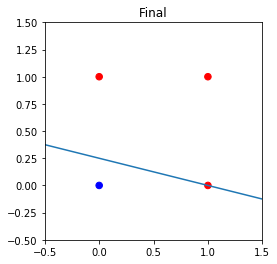

Ecuación de la recta: Y = -( 0.2 / 0.8 ) * X + ( 0.2 / 0.8 )
Ecuación de la recta: Y = -( 0.25 ) * X + ( 0.25 )


In [54]:
# Dataframe de salida
columnas = [
            'Iteracion','Entrada_1', 'Entrada_2', 'Peso_Inicial_1', 'Peso_Inicial_2', 
            'Salida_Obtenida', 'Salida_deseada', 'Error', 'Peso_Final_1', 'Peso_Final_2'
        ]

# Array de datos
datos = np.array([])

# Array de datos para cada iteración
datos_temp = np.array([])

# Pesos aleatorios
pesos = np.array([round(np.random.uniform(-1, 1), 1), round(np.random.uniform(-1, 2), 1)])

# Entradas a la red
entradas_OR = np.array([[0,0],[0,1],[1,0],[1,1]])

# Salidas esperadas
resultados_OR = np.array([0, 1, 1, 1])

# Coeficiente de aprendizaje
learning_rate = 0.1

# Umbral para la función escalón
umbral = 0.2

# Iteración
epoch = 1

# Variable que indica se si ha terminado el entrenamiento
entrenado = False

# Número de error detectados por iteración
num_errores = 0

# Número de gráficas. Comienza por la 1
img = 1

# Cálculo del hiperplano para los pesos al comienzo del entrenamiento, en este caso una recta
punto_A = [2 , -(pesos[0]/pesos[1]) *   2 + (umbral/pesos[1])]
punto_B = [-1, -(pesos[0]/pesos[1]) *  -1 + (umbral/pesos[1])]
pintar_OR(punto_A[0], punto_B[0], punto_A[1], punto_B[1], "Inicio", img)
img += 1

# Hasta que no haya terminado el entrenamiento, se itera
while (entrenado == False):
  
    num_errores = 0
    
    # Recorremos las 4 entradas
    for i in range(0, entradas_OR.shape[0]):
        
        datos_temp = np.array([])
        
        # Cálculo de la salida del perceptrón
        resultado_obtenido = Calcular_Perceptron_2_Entradas(entradas_OR[i], pesos, umbral)
        
        # Cálculo del error
        error_obtenido = Calculo_Error(resultados_OR[i], resultado_obtenido)

        # CSV
        datos_temp = np.append(datos_temp, epoch)
        datos_temp = np.append(datos_temp, entradas_OR[i][0])
        datos_temp = np.append(datos_temp, entradas_OR[i][1])
        datos_temp = np.append(datos_temp, round(pesos[0], 1))
        datos_temp = np.append(datos_temp, round(pesos[1], 1))
        datos_temp = np.append(datos_temp, resultado_obtenido)
        datos_temp = np.append(datos_temp, resultados_OR[i])
        datos_temp = np.append(datos_temp, error_obtenido)
        
        # Cuando el error es distinto de 0, tenemos que recalcular pesos
        if error_obtenido != 0:
            
            # Recalculamos pesos
            pesos[0] = pesos[0] + learning_rate * error_obtenido * entradas_OR[i][0]
            pesos[1] = pesos[1] + learning_rate * error_obtenido * entradas_OR[i][1]
            
            # Aumentamos en 1 los errores encontrados en la iteración
            num_errores += 1
            
            # Cálculo del hiperplano para los pesos al comienzo del entrenamiento, en este caso una recta (para el vídeo)
            punto_A = [2 , -(pesos[0]/pesos[1]) *  2 + (umbral/pesos[1])]
            punto_B = [-1, -(pesos[0]/pesos[1]) *  -1 + (umbral/pesos[1])]
            pintar_OR(punto_A[0], punto_B[0], punto_A[1], punto_B[1], "Epoch: " + str(epoch) + ", entrada: " + str(entradas_OR[i]) +
                      ", salida esperada: " + str(resultados_OR[i]) + ", salida obtenida: " + str(resultado_obtenido) +
                      ", error: " + str(error_obtenido), img)
            img += 1
        
        # CSV
        datos_temp = np.append(datos_temp, round(pesos[0], 1))
        datos_temp = np.append(datos_temp, round(pesos[1], 1))
        
        datos = np.append(datos, datos_temp)
    
    # Cuando para las 4 entrdas, el error es 0 en todas ellas, se termina el entrenamiento
    if num_errores == 0:
        entrenado = True
    
    # Aumento del número de iteración
    epoch += 1
    
# Cálculo del hiperplano para los pesos al final del entrenamiento, en este caso una recta    
punto_A = [2 , -(pesos[0]/pesos[1]) *  2 + (umbral/pesos[1])]
punto_B = [-1 , -(pesos[0]/pesos[1]) *  -1 + (umbral/pesos[1])]
pintar_OR(punto_A[0], punto_B[0], punto_A[1], punto_B[1], "Final", img, True)
img += 1
    
# Recolocación de los datos para una mejor visualización de los mismo
datos = datos.reshape(int(datos.shape[0] / 10), 10)

# Guardado de los datos de entrenamiento en un csv
csv = pd.DataFrame(data=datos[0:,0:], index=datos[0:,0], columns=columnas)
csv.to_csv('L2P1_apartado3_OR.csv')

# Ecuación de la recta separatoria
print("Ecuación de la recta: Y = -(", pesos[0] ,"/", pesos[1] ,") * X + (", umbral ,"/", pesos[1] ,")")
print("Ecuación de la recta: Y = -(", pesos[0] / pesos[1] ,") * X + (", umbral  / pesos[1] ,")")

# Creación del vídeo
crear_video(img)

# Impresión del vídeo
HTML("""
    <video width="400" height="400" controls>
      <source src="Evolucion.mp4" type="video/mp4">
    </video>
""")